In [1]:
%matplotlib inline

In [2]:
import pickle as pkl
import numpy as np
import pandas as pd
from graph_tool import load_graph, GraphView
from graph_tool.draw import sfdp_layout, graph_draw
from matplotlib import pyplot as plt

In [42]:
g = load_graph('data/digg/graph.gt')

In [56]:
cid = 4
cascade = pkl.load(open('data/digg/small_cascade_{}.pkl'.format(cid), 'rb'))

In [57]:
obs, edges = pkl.load(open('outputs/real_cascade_experiment/small_cascade_{}/closure/0.2/0.pkl'.format(cid), 'rb'))

In [58]:
cascade_log = np.log(cascade + 2)

In [59]:
infected_nodes = (cascade >= 0).nonzero()[0]
print(infected_nodes)

[  6293   6395  16859  16891  17286  17806  21736  22129  23549  25112
  27853  31560  32706  34966  38110  38382  40867  47591  47602  50685
  51682  52148  54163  63746  64902  67092  75013  75284  78360  84953
  88937  89747  91910  92678  93385  93787  96582  97315  97440  98035
  98757 100687 101484 104658 108048 108241 110545 115822 122589 123853
 125539 126354 127462 128187 130012 133875 133905 138563 138693 139170
 147161 147845 154292 162918 165902 166550 166666 169220 174653 176094
 176355 177410 178883 182230 182430 185884 193528 194706 207315 208454
 214135 218586 220538 220799 223724 227227 234039 235360 235542 237344
 240503 242111 246266 249167 250675 252031 254854 255294 255958 257765
 257883 257913 259691 261238 261314 261489 262263 262787 265820 269864
 274397 274594 275847 278942]


In [88]:
print(len(infected_nodes))

114


In [60]:
predicted_infection = {u for e in edges for u in e}
subg_nodes = set(infected_nodes) | predicted_infection
uninfected = predicted_infection - set(infected_nodes)

In [61]:
len(subg_nodes)

118

In [62]:
vfilt = g.new_vertex_property('bool')
for n in subg_nodes:
    vfilt[n] = True
subg = GraphView(g, vfilt=vfilt)

In [63]:
pos = sfdp_layout(subg)

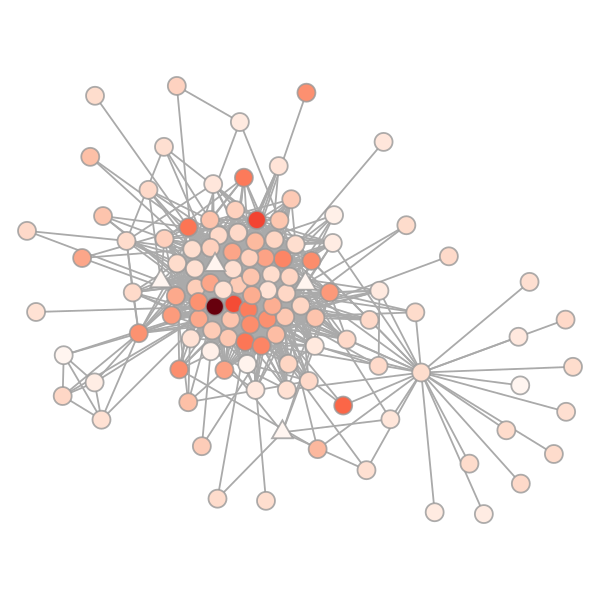

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8c589a3588, at 0x7f8c589a2f98>

In [86]:
color = subg.new_vertex_property('double')
for v in subg.vertices():
    color[v] = cascade_log[int(v)]
color.a /= color.a.max() 
shape = subg.new_vertex_property('int')
size = subg.new_vertex_property('int')
size.a = 18

for u in subg.vertices():
    if u in uninfected:
        shape[u] = 1
        color[u] = color.a.max()
        size[u] = 24

graph_draw(subg, pos=pos, vertex_fill_color=color, vcmap=plt.cm.Reds_r, vertex_size=size, vertex_shape=shape, 
           edge_color='#aaaaaa', 
           output='figs/case-study/truth.pdf')

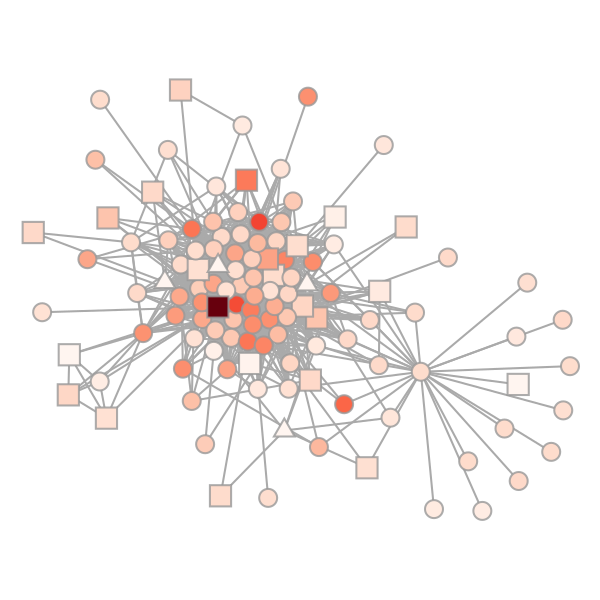

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8c589a3588, at 0x7f8c589a2f98>

In [87]:
# shape = subg.new_vertex_property('int')
for v in obs:
    size[v] = 30
    shape[v] = 2    
# for v in uninfected
    
graph_draw(subg, pos=pos, 
           vertex_fill_color=color, 
           vertex_size=size,
           vertex_shape=shape,
           vcmap=plt.cm.Reds_r, 
           edge_color='#aaaaaa',
           output='figs/case-study/observation.png')

In [66]:
print('#obs, #predicted nodes')
print(len(obs), len(predicted_infection))

#obs, #predicted nodes
23 30


In [67]:
print('precision', len(set(infected_nodes).intersection(predicted_infection)) / len(predicted_infection))
print('recall', len(set(infected_nodes).intersection(predicted_infection)) / len(infected_nodes))

precision 0.8666666666666667
recall 0.22807017543859648


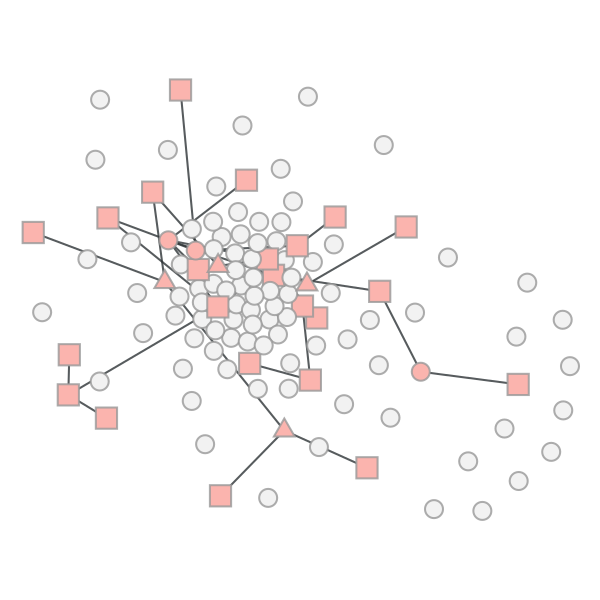

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8c589a3588, at 0x7f8c589a2f98>

In [89]:
color = subg.new_vertex_property('int')
for u in predicted_infection:
    color[u] = 1
efilt = subg.new_edge_property('bool')
for u, v in edges:
    efilt[subg.edge(u, v)] = True
predicted_tree = GraphView(subg, efilt=efilt)
    
graph_draw(predicted_tree, pos=pos, 
           vertex_fill_color=color, 
           vertex_size=size,
           vertex_shape=shape,
           vcmap=plt.cm.Pastel1_r,
           output='figs/case-study/prediction.pdf')

In [92]:
from utils import cascade_size
a = []
for cid in range(10):
    cascade = pkl.load(open('data/digg/small_cascade_{}.pkl'.format(cid), 'rb'))
    a.append(cascade_size(cascade))
print(np.mean(a))

110.1
